# Kepler Regression Problem

## importing all modules

In [68]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import scale
#from sklearn import cross_validation
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error

import plotly   
from plotly.graph_objs import *
import plotly.offline as plot
import plotly.graph_objs as go
plot.offline.init_notebook_mode(connected=True)

# for OLS
import statsmodels.formula.api as sm
import statsmodels.stats.diagnostic as sms

## importing files

In [117]:
Regression_Data = pd.read_csv('Ex01_Kepler_Regression.csv')
Regression_Data = Regression_Data.drop(['planet'], axis =1)
#Regression_Data

## Description of imported data

In [118]:
Regression_Data.describe()

,SemiMajorAxis,Volume,EscapeVelocity,Density,OrbitalPeriod
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,8.519732,5.293866,19.024730,3.378478,41.075821
std,10.565579,3.157912,15.921142,2.054429,68.561892
min,0.342913,0.938483,4.116927,0.606581,0.139457
25%,0.819675,1.568645,7.889534,1.347440,0.661700
50%,1.611082,6.176427,11.942805,3.606159,2.705803
75%,17.355666,7.603052,24.327655,5.349413,60.932861
max,36.673928,11.253846,68.147983,7.111330,319.583338


## Correlation details

In [119]:
Regression_Data.corr()

,SemiMajorAxis,Volume,EscapeVelocity,Density,OrbitalPeriod
SemiMajorAxis,1.000000,0.278926,0.323329,-0.716234,0.918149
Volume,0.278926,1.000000,-0.015625,-0.153851,0.229391
EscapeVelocity,0.323329,-0.015625,1.000000,-0.687354,0.225476
Density,-0.716234,-0.153851,-0.687354,1.000000,-0.565611
OrbitalPeriod,0.918149,0.229391,0.225476,-0.565611,1.000000


## Coorelation Plot

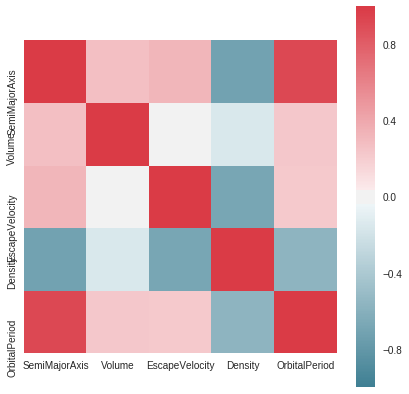

In [120]:
f, ax = plt.subplots(figsize = (7,7))
correlation = Regression_Data.corr()
sns.heatmap(correlation, mask=np.zeros_like(correlation, dtype=np.bool), 
            cmap = sns.diverging_palette(220, 10, as_cmap=True), square=True, ax = ax)
plt.show()


# Data

In [121]:
for i in Regression_Data.columns.tolist():
    Regression_Data[i] = (Regression_Data[i] - Regression_Data[i].mean())/(Regression_Data[i].var())

In [123]:
df_x = Regression_Data.drop(['OrbitalPeriod'], axis = 1)

df_y = Regression_Data.drop(['SemiMajorAxis', 'Volume', 'EscapeVelocity', 'Density'], axis = 1)

## Train and Test Data

In [124]:
df_x_train = df_x.iloc[:-20]
df_y_train = df_y.iloc[:-20]

df_x_test = df_x.iloc[80:]
df_y_test = df_y.iloc[80:]
#df_y_train.head()

## Linear Regression

## Intercept and coefficients by taking all features

In [125]:
reg = linear_model.LinearRegression()
reg.fit(df_x_train,df_y_train)
coefficients = reg.coef_.tolist()
intercept = reg.intercept_.tolist()

In [126]:
mean_square_error = np.mean((reg.predict(df_x_test) - df_y_test)**2)
mean_square_error

OrbitalPeriod    0.00003
dtype: float64

In [127]:
variance = reg.score(df_x_test, df_y_test)
variance

0.87324815511809661

# Scatter Plot

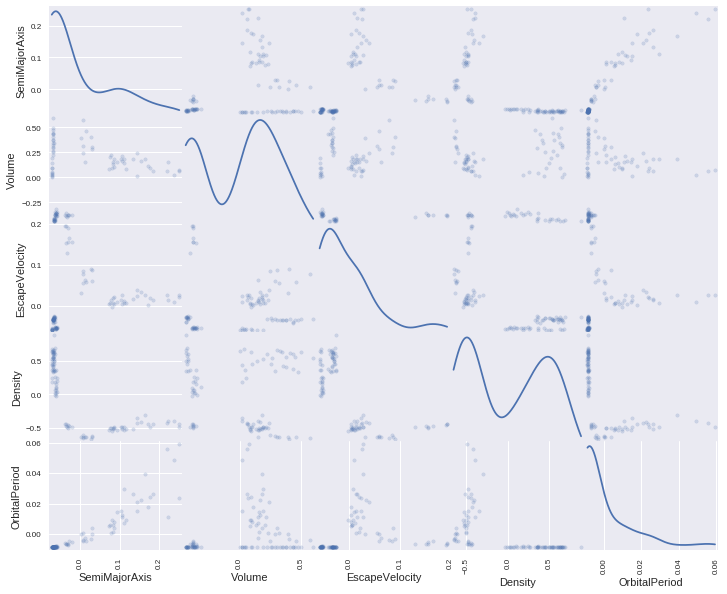

In [128]:
pd.scatter_matrix(Regression_Data, alpha=.2, figsize=(12,10), diagonal='kde')
plt.show()

# Feature Selection

## Ridge Regression

In [129]:
alphas = 10**(np.linspace(-5,0,100))
Ridge_df = pd.DataFrame()
model = Ridge()
coeff =  []
for a in alphas:
    model.set_params(alpha = a)
    model.fit(df_x_train, df_y_train)
    coeff.append(model.coef_)
    df = pd.DataFrame({'SemiMajorAxis':[model.coef_[0][0]],'Volume':[model.coef_[0][1]],
                       'EscapeVelocity':[model.coef_[0][2]],'Density':[model.coef_[0][3]]})
    Ridge_df = Ridge_df.append(df)

In [130]:
trace0 = Scatter(
    x = alphas,
    y = Ridge_df['SemiMajorAxis'],
    name = 'SemiMajorAxis',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
    )
trace1 = Scatter(
    x = alphas,
    y = Ridge_df['Volume'],
    name = 'Volume',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4)
)
trace2 = Scatter(
    x = alphas,
    y = Ridge_df['EscapeVelocity'],
    name = 'EscapeVelocity',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = Scatter(
    x = alphas,
    y = Ridge_df['Density'],
    name = 'Density',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)


data = [trace0, trace1, trace2, trace3]

layout = dict(xaxis = dict(title = 'Alpha'),
              yaxis = dict(title = 'Weights'),
              )

fig = dict(data = data, layout = layout)
plot.iplot(fig, filename='RidgeRegression.html')

In [131]:
ridge2 = Ridge(alpha=0.005, normalize=True)
ridge2.fit(df_x_train, df_y_train.OrbitalPeriod) # Fit a ridge regression on the training data
pred2 = ridge2.predict(df_x_test) # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index=df_x_train.columns)) # Print coefficients
print(mean_squared_error(df_y_test, pred2)) # Calculate the test MSE

SemiMajorAxis     0.156190
Volume           -0.001266
EscapeVelocity    0.001996
Density           0.005160
dtype: float64
3.08508863843e-05


In [132]:
ridge2 = Ridge(alpha=0.1, normalize=True)
ridge2.fit(df_x_train, df_y_train.OrbitalPeriod) # Fit a ridge regression on the training data
pred2 = ridge2.predict(df_x_test) # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index=df_x_train.columns)) # Print coefficients
print(mean_squared_error(df_y_test, pred2)) # Calculate the test MSE

SemiMajorAxis     0.127496
Volume           -0.000323
EscapeVelocity   -0.010297
Density           0.000287
dtype: float64
4.17808969157e-05


In [133]:
ridgecv = RidgeCV(alphas=alphas, scoring='mean_squared_error', normalize=True)
ridgecv.fit(df_x_train, df_y_train)
ridgecv.alpha_

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_

0.0095454845666183372

## Lasso

In [134]:
Lasso_df = pd.DataFrame()
coeff  = []
lasso = Lasso(max_iter = 10000, normalize = True)
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(df_x_train, df_y_train)
    coeff.append(model.coef_)
    df_new = pd.DataFrame({'SemiMajorAxis':[model.coef_[0][0]],'Volume':[model.coef_[0][1]],
                       'EscapeVelocity':[model.coef_[0][2]],'Density':[model.coef_[0][3]]})
    Lasso_df = Lasso_df.append(df_new)


In [135]:
trace0 = Scatter(
    x = alphas,
    y = Lasso_df['SemiMajorAxis'],
    name = 'SemiMajorAxis',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = Scatter(
    x = alphas,
    y = Lasso_df['Volume'],
    name = 'Volume',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4)
)
trace2 = Scatter(
    x = alphas,
    y = Lasso_df['EscapeVelocity'],
    name = 'EscapeVelocity',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = Scatter(
    x = alphas,
    y = Lasso_df['Density'],
    name = 'Density',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)

data = [trace0, trace1, trace2, trace3]

# Edit the layout
layout = dict(xaxis = dict(title = 'alpha'),
              yaxis = dict(title = 'Weights'),
              )

fig = dict(data=data, layout=layout)
plot.iplot(fig, filename='LassoRegression.html')

In [136]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(df_x_train, df_y_train.OrbitalPeriod)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(df_x_train, df_y_train.OrbitalPeriod)
mean_squared_error(df_y_test.OrbitalPeriod, lasso.predict(df_x_test))

3.1104797472185231e-05

In [137]:
pd.Series(lasso.coef_, index=df_x_test.columns)

SemiMajorAxis     0.155054
Volume           -0.001115
EscapeVelocity    0.000000
Density           0.004753
dtype: float64

In [138]:
# from this we can see that we can easily omit Escape Velocity,Volume

# Model Selection

## Model1

In [140]:
model_4 = sm.ols(formula = "OrbitalPeriod ~ SemiMajorAxis ", data = Regression_Data[:80]).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          OrbitalPeriod   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     407.9
Date:                Sun, 02 Apr 2017   Prob (F-statistic):           1.02e-32
Time:                        17:18:49   Log-Likelihood:                 299.81
No. Observations:                  80   AIC:                            -595.6
Df Residuals:                      78   BIC:                            -590.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0003      0.001     -0.450      0.654      -0.002       0.001
SemiMajorAxis     0.1370      0.007     20.196      0.000       0.123       0.150
==============================================================================
Omnibus:                       32.642   Durbin-Watson:                   2.190
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.607
Skew:                           1.092   Prob(JB):                     2.93e-31
Kurtosis:                       9.117   Cond. No.                         10.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
#df_y_test.Age

In [142]:
y_model_4 = model_4.predict(df_x_test)

## Plot of Predicted Data vs Actual Data 

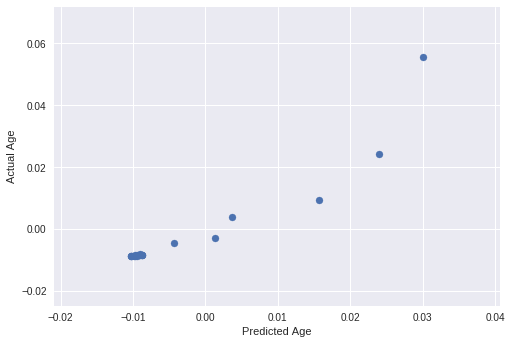

In [143]:
plt.scatter(y_model_4, df_y_test)
plt.xlabel("Predicted Age")
plt.ylabel("Actual Age")
plt.show()

In [150]:
#plotly

In [151]:
trace = go.Scatter(
    x=y_model_4,
    y=df_y_test.OrbitalPeriod,
    mode='markers',
    name = 'Predicted vs Original',
    line=dict(shape='linear')
)
trace1 = go.Scatter(
    x= df_y_test.OrbitalPeriod,
    y= df_y_test.OrbitalPeriod,
    mode='lines',
    name = 'x = y',
    line=dict(shape='linear')
)
data = [trace, trace1]
layout = dict(
    legend=dict(
        traceorder='reversed',
        font=dict(size=16)
    )
)
fig = dict(data=data, layout=layout)
plot.iplot(fig, filename='Scatter plot for Normal Regression')

In [152]:
SSE_new = ((y_model_4 - df_y_test.OrbitalPeriod)**2).sum()
mean = df_y_test.OrbitalPeriod.mean()
TSS = ((y_model_4 - mean)**2).sum()
R_Square_new = 1-(SSE_new/TSS)
R_Square_new

0.7455702883072447

In [153]:
RMSE = (((df_y_test.OrbitalPeriod - mean)**2).sum()) * ((1 - R_Square_new)/100)
RMSE

1.2155168913793212e-05

# Box Plot

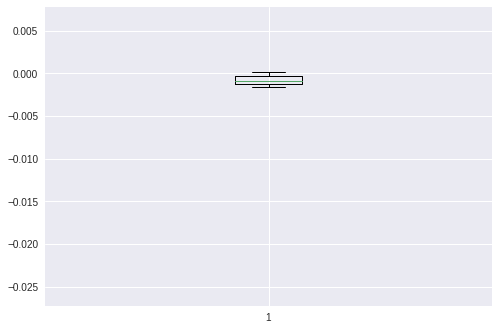

In [154]:
residual_new = np.array(y_model_4 - df_y_test.OrbitalPeriod)
plt.boxplot(residual_new)
plt.show()

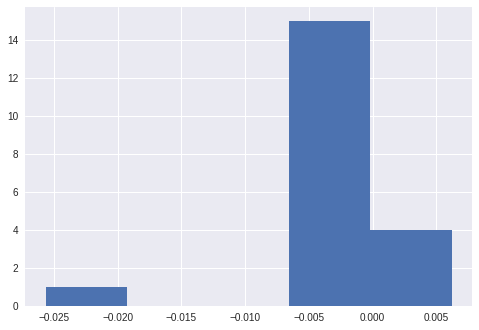

In [155]:
plt.hist(residual_new, bins=5)
plt.show()

In [156]:
# we plot histogram of residuals to check wheater the residuals are following NORAMAL DISTRIBUTION or not.

# Test Hypothesis

In [157]:
name = ['F statistics', 'p_value']
test = sms.het_goldfeldquandt(model_4.resid, model_4.model.exog)
list(zip(name,test))

[('F statistics', 1.1988360738472774), ('p_value', 0.28947481132600311)]

In [178]:
# to check the p value